
# Clusterização de Pokemóns
# Integrantes:
Alessandra Blücher; 
Bruno Arthur Cesconetto; 
Dennis Zaramelo Felex -
2°C


In [1]:
#importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #para gráfico estilizado
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#lendo os dataframes
pokemons = pd.read_json('pokedex.json')
itens = pd.read_json('items.json')
habilidades = pd.read_json('skills.json')
tipos = pd.read_json('types.json')

In [3]:
pokemons.head()

,base,cname,ename,flatName,id,jname,model,skills,type
0,"{'Attack': 49, 'Defense': 49, 'HP': 45, 'Sp.At...",妙蛙种子,Bulbasaur,NaN,1,フシギダネ,NaN,"{'egg': [133, 204, 174, 203, 202, 320, 580, 27...","[草, 毒]"
1,"{'Attack': 62, 'Defense': 63, 'HP': 60, 'Sp.At...",妙蛙草,Ivysaur,NaN,2,フシギソウ,NaN,"{'egg': [133, 204, 174, 203, 202, 320, 580, 27...","[草, 毒]"
2,"{'Attack': 82, 'Defense': 83, 'HP': 80, 'Sp.At...",妙蛙花,Venusaur,NaN,3,フシギバナ,NaN,"{'egg': [133, 204, 174, 203, 202, 320, 580, 27...","[草, 毒]"
3,"{'Attack': 52, 'Defense': 43, 'HP': 39, 'Sp.At...",小火龙,Charmander,NaN,4,ヒトカゲ,NaN,"{'egg': [314, 246, 251, 187, 44, 68, 242, 349,...",[炎]
4,"{'Attack': 64, 'Defense': 58, 'HP': 58, 'Sp.At...",火恐龙,Charmeleon,NaN,5,リザード,NaN,"{'egg': [314, 246, 251, 187, 44, 68, 242, 349,...",[炎]


In [4]:
#abrindo o dicionário contido em pokemons.base e adicionando novas colunas ao dataframe, uma para cada atributo do dicionário: 

#criando listas as quais armazenam os valores de um mesmo atributo
Attack= []
Defense = []
HP = []
SpAtk = []
SpDef = []
Speed = []

#percorrendo o dicionário e adicionando os valores às listas
for idx, row in pokemons['base'].iteritems(): #para cada index i, em cada linha dessa coluna base...
    l=row.keys()   #l é uma variável que contempla as chaves do dicionário

    if 'Attack' in l:   #quando a variável assume a chave ataque
        Attack.append(row['Attack']) #adicionamos seu valor a lista externa "ataque"
    else:
        Attack.append(None) #caso não haja, pass
    if 'Defense' in l:
        Defense.append(row['Defense'])
    else:
        Defense.append(None)
    if 'HP' in l:
        HP.append(row['HP'])
    else:
        HP.append(None)
    if 'Sp.Atk' in l:
        SpAtk.append(row['Sp.Atk'])
    else:
        SpAtk.append(None)
    if 'Sp.Def' in l:
        SpDef.append(row['Sp.Def'])
    else:
        SpDef.append(None) 
    if 'Speed' in l:
        Speed.append(row['Speed'])
    else:
        Speed.append(None)
    
#criando as novas colunas com os valores separados
pokemons['Attack']=Attack
pokemons['Defense']=Defense
pokemons['HP']=HP
pokemons['Sp.Atk']=SpAtk
pokemons['Sp.Def']=SpDef
pokemons['Speed']=Speed


In [5]:
#filtrando o dataframe
df = pokemons[['ename','type','Attack','Defense','HP','Sp.Atk','Sp.Def','Speed']]

#renomenando as colunas
df.columns = ['nome','tipo','ataque','defesa','HP','spe.atk','spe.def','velocidade']

df.head()

,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade
0,Bulbasaur,"[草, 毒]",49,49,45,65,65,45
1,Ivysaur,"[草, 毒]",62,63,60,80,80,60
2,Venusaur,"[草, 毒]",82,83,80,100,100,80
3,Charmander,[炎],52,43,39,60,50,65
4,Charmeleon,[炎],64,58,58,80,65,80


## Explicação e Exemplos de aplicação de clusters

Referência teórica para diferentes métodos de clusterzação: <br>
http://scikit-learn.org/stable/modules/clustering.html</br>

Exemplos de clusterização por K-means:<br> http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html</br>
<br>http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py</br>

# Verificando o número ideal de clusters

In [6]:
#guarando os dados em variáveis
v1 = df['ataque']
v2 = df['defesa']
v3 = df['HP']
v4 = df['spe.atk']
v5 = df['spe.def']
v6 = df['velocidade']

#as variáveis serão componentes de uma matriz
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

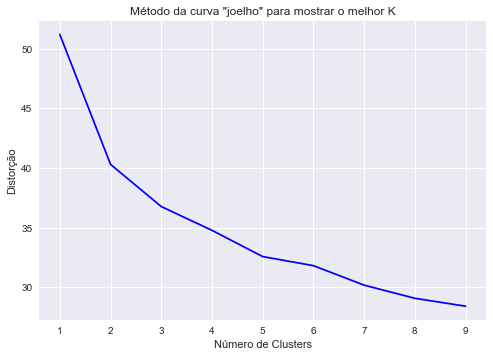

In [7]:
#kmeans determina o k ideal
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

#plotando 
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorção')
plt.title('Método da curva "joelho" para mostrar o melhor K')
plt.show()
 

# Clusterizando o Dataframe

Será considerada na clusterização 4 variáveis: ataque, defesa, hp e velocidade; <br>
Como um gráfico 3D adimite apenas 3 variáveis, será necessário "quebrar" a quarta variável e, a partir desta delimitação, será plotado o gráfico com os clusters visualizando as outras 3 variáveis;</br>
<br> O objetivo do trabalho é rotular os clusters obtidos, os quais serão exibidos por diversas perspectivas, dada a delimitação de variáveis mencionada.</br>

In [8]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
df.loc[:,'cluster'] = kmeans.labels_ #indentificando cada um dos pokemóns por seu cluster numa nova coluna para futura análise
df.head()

C:\Users\denni\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\denni\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade,cluster
0,Bulbasaur,"[草, 毒]",49,49,45,65,65,45,1
1,Ivysaur,"[草, 毒]",62,63,60,80,80,60,2
2,Venusaur,"[草, 毒]",82,83,80,100,100,80,2
3,Charmander,[炎],52,43,39,60,50,65,1
4,Charmeleon,[炎],64,58,58,80,65,80,2


# Função-Plot do resultado do fit realizado pelo Kmeans 

In [9]:
#função que plota o gráfico com os clusters
def showcluster(info, k, color, titulo):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(titulo)
    ax.set_xlabel(str(info[0].name))
    ax.set_ylabel(str(info[1].name))
    ax.set_zlabel(str(info[2].name))
    if k!=len(color):
        print ("numero de cores diferente de clusters", len(color),k)
        return 0
    for i in range(0,k):
        ax.scatter(info[0][df.cluster==i], info[1][df.cluster==i], info[2][df.cluster==i], marker='o', c=color[i])
    return fig

# Análise de sensibilidade

### Para dado poder de ataque, como as outras três variáveis interferem na distribuição?

In [10]:
#ataques baixos
ataque40 = df[df.ataque<=40]

#variáveis que comporão a matriz para o fit (cada variável armazena os valores de uma das colunas de interesse)
v1 = ataque40['ataque']
v2 = ataque40['defesa']
v3 = ataque40['HP']
v4 = ataque40['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4) #arranjo numa matriz

In [11]:
kmeans = KMeans(n_clusters=4).fit(X) #clusterização
y_kmeans = kmeans.predict(X)
ataque40.loc[:,'cluster'] = kmeans.labels_

C:\Users\denni\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
#ataques médios
ataque80 = df[(df['ataque']>40) & (df['ataque'] <= 80)]
#repetindo o processo da clusterização
v1 = ataque80['ataque']
v2 = ataque80['defesa']
v3 = ataque80['HP']
v4 = ataque80['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [13]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
ataque80.loc[:,'cluster'] = kmeans.labels_

C:\Users\denni\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
#ataques fortes
ataquef = df[df['ataque'] > 80]
#repetindo o processo da clusterização
v1 = ataquef['ataque']
v2 = ataquef['defesa']
v3 = ataquef['HP']
v4 = ataquef['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [15]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
ataquef.loc[:,'cluster'] = kmeans.labels_


C:\Users\denni\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


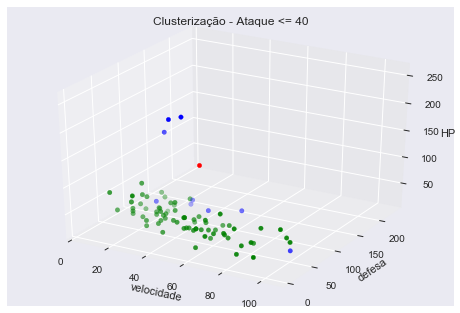

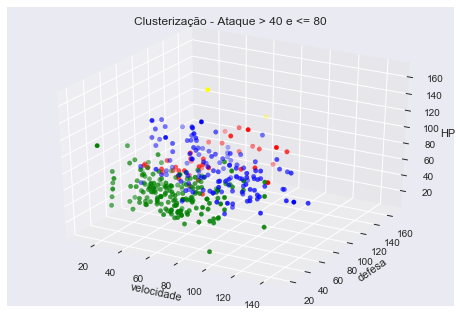

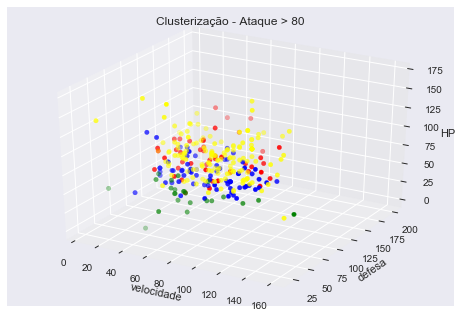

In [16]:
#área de plotagem
fig = plt.figure(figsize=plt.figaspect(0.5))

plot = showcluster([ataque40.velocidade,ataque40.defesa,ataque40.HP],4,[['red'],['green'],['blue'],['yellow']], 'Clusterização - Ataque <= 40')

plot = showcluster([ataque80.velocidade,ataque80.defesa,ataque80.HP],4,[['red'],['green'],['blue'],['yellow']], 'Clusterização - Ataque > 40 e <= 80')

plot = showcluster([ataquef.velocidade,ataquef.defesa,ataquef.HP],4,[['red'],['green'],['blue'],['yellow']], 'Clusterização - Ataque > 80')

plt.show()


### Separando os dataframes de ataque por clusters

In [17]:
#ataques fracos
a400 = ataque40[ataque40.cluster==0]
a401 = ataque40[ataque40.cluster==1]
a402 = ataque40[ataque40.cluster==2]
a403 = ataque40[ataque40.cluster==3]
ataque40.cluster.value_counts()

0    45
1    35
2     3
3     1
Name: cluster, dtype: int64

In [18]:
#ataques médios
a800 = ataque80[ataque80.cluster==0]
a801 = ataque80[ataque80.cluster==1]
a802 = ataque80[ataque80.cluster==2]
a803 = ataque80[ataque80.cluster==3]
ataque80.cluster.value_counts()

3    154
1     96
2     62
0     42
Name: cluster, dtype: int64

In [19]:
#ataques fortes
af0 = ataquef[ataquef.cluster==0]
af1 = ataquef[ataquef.cluster==1]
af2 = ataquef[ataquef.cluster==2]
af3 = ataquef[ataquef.cluster==3]
ataquef.cluster.value_counts()

1    82
2    80
3    75
0    46
Name: cluster, dtype: int64

### Para dada capacidade de defesa, como as outras três variáveis interferem na distribuição?

In [20]:
#defesas baixas
defesa40 = df[df.defesa<=40]

#repetindo o processo da clusterização
v1 = defesa40['ataque']
v2 = defesa40['defesa']
v3 = defesa40['HP']
v4 = defesa40['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [21]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
defesa40.loc[:,'cluster'] = kmeans.labels_

C:\Users\denni\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
#defesas médias
defesa80 = df[(df['defesa']>40) & (df['defesa'] <= 80)]
#repetindo o processo da clusterização
v1 = defesa80['ataque']
v2 = defesa80['defesa']
v3 = defesa80['HP']
v4 = defesa80['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [23]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
defesa80.loc[:,'cluster'] = kmeans.labels_

C:\Users\denni\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [24]:
#defesas fortes
defesaf = df[df['defesa'] > 80]
#repetindo o processo da clusterização
v1 = defesaf['ataque']
v2 = defesaf['defesa']
v3 = defesaf['HP']
v4 = defesaf['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [25]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
defesaf.loc[:,'cluster'] = kmeans.labels_

C:\Users\denni\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


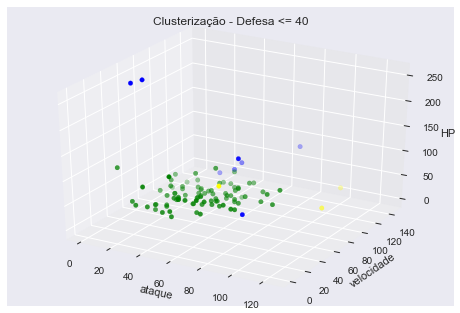

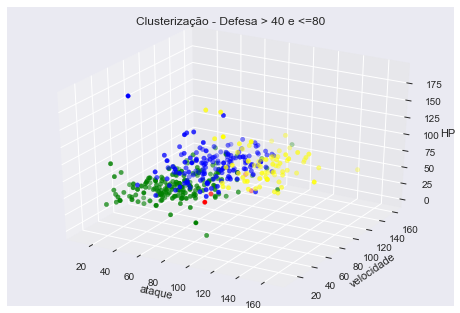

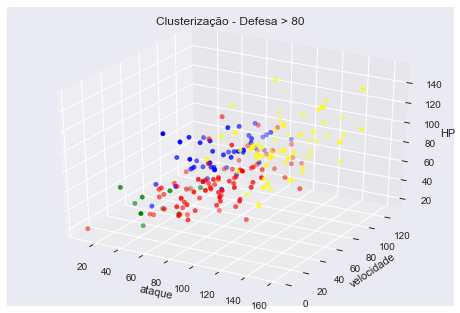

In [26]:
#área de plotagem
fig = plt.figure(figsize=plt.figaspect(0.5))

plot = showcluster([defesa40.ataque,defesa40.velocidade,defesa40.HP],4,[['red'],['green'],['blue'],['yellow']], 'Clusterização - Defesa <= 40')

plot = showcluster([defesa80.ataque,defesa80.velocidade,defesa80.HP],4,[['red'],['green'],['blue'],['yellow']], 'Clusterização - Defesa > 40 e <=80')

plot = showcluster([defesaf.ataque,defesaf.velocidade,defesaf.HP],4,[['red'],['green'],['blue'],['yellow']], 'Clusterização - Defesa > 80')

plt.show()

### Separando os dataframes de defesa por clusters

In [27]:
#defesas fracas
d400 = defesa40[defesa40.cluster==0]
d401 = defesa40[defesa40.cluster==1]
d402 = defesa40[defesa40.cluster==2]
d403 = defesa40[defesa40.cluster==3]
defesa40.cluster.value_counts()

2    46
0    46
3     5
1     2
Name: cluster, dtype: int64

In [28]:
#defesas médias
d800 = defesa80[defesa80.cluster==0]
d801 = defesa80[defesa80.cluster==1]
d802 = defesa80[defesa80.cluster==2]
d803 = defesa80[defesa80.cluster==3]
defesa80.cluster.value_counts()

1    155
3    109
0     75
2     71
Name: cluster, dtype: int64

In [29]:
#defesas fortes
df0 = defesaf[defesaf.cluster==0]
df1 = defesaf[defesaf.cluster==1]
df2 = defesaf[defesaf.cluster==2]
df3 = defesaf[defesaf.cluster==3]
defesaf.cluster.value_counts()

0    72
1    70
3    45
2    25
Name: cluster, dtype: int64

   ### Para dado nível de HP, como as outras três variáveis interferem na distribuição?

In [30]:
#HP baixo
HP40 = df[df.HP<=40]

#repetindo o processo da clusterização
v1 = HP40['ataque']
v2 = HP40['defesa']
v3 = HP40['HP']
v4 = HP40['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [31]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
HP40.loc[:,'cluster'] = kmeans.labels_

C:\Users\denni\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [32]:
#HP médio
HP80 = df[(df['HP']>40) & (df['HP'] <= 80)]
#repetindo o processo da clusterização
v1 = HP80['ataque']
v2 = HP80['defesa']
v3 = HP80['HP']
v4 = HP80['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [33]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
HP80.loc[:,'cluster'] = kmeans.labels_

C:\Users\denni\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
#HP alto
HPa = df[df['HP'] > 80]
#repetindo o processo da clusterização
v1 = HPa['ataque']
v2 = HPa['defesa']
v3 = HPa['HP']
v4 = HPa['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [35]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
HPa.loc[:,'cluster'] = kmeans.labels_

C:\Users\denni\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


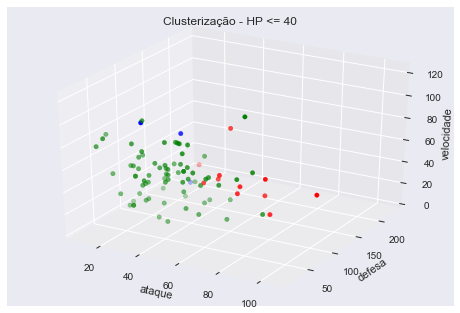

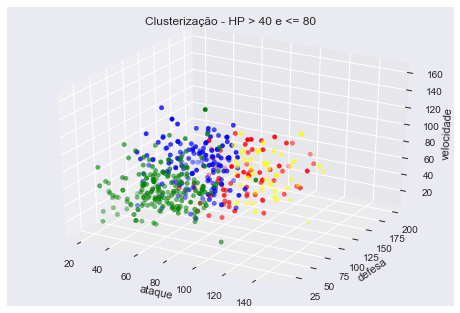

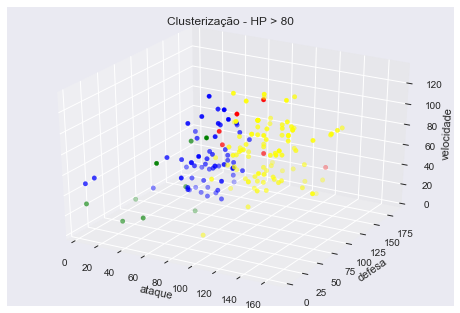

In [36]:
#área de plotagem
fig = plt.figure(figsize=plt.figaspect(0.5))

plot = showcluster([HP40.ataque,HP40.defesa,HP40.velocidade],4,[['red'],['green'],['blue'],['yellow']], 'Clusterização - HP <= 40')

plot = showcluster([HP80.ataque,HP80.defesa,HP80.velocidade],4,[['red'],['green'],['blue'],['yellow']], 'Clusterização - HP > 40 e <= 80')

plot = showcluster([HPa.ataque,HPa.defesa,HPa.velocidade],4,[['red'],['green'],['blue'],['yellow']], 'Clusterização - HP > 80')

plt.show()

### Separando os dataframes de HP por clusters

In [37]:
#HP Baixo
hp400 = HP40[HP40.cluster==0]
hp401 = HP40[HP40.cluster==1]
hp402 = HP40[HP40.cluster==2]
hp403 = HP40[HP40.cluster==3]
HP40.cluster.value_counts()

0    35
2    34
1    18
3     1
Name: cluster, dtype: int64

In [38]:
#HP Médio
hp800 = HP80[HP80.cluster==0]
hp801 = HP80[HP80.cluster==1]
hp802 = HP80[HP80.cluster==2]
hp803 = HP80[HP80.cluster==3]
HP80.cluster.value_counts()

0    137
3    132
1    111
2     85
Name: cluster, dtype: int64

In [39]:
#HP Alto
hpa0 = HPa[HPa.cluster==0]
hpa1 = HPa[HPa.cluster==1]
hpa2 = HPa[HPa.cluster==2]
hpa3 = HPa[HPa.cluster==3]
HPa.cluster.value_counts()

1    60
0    55
3    50
2     3
Name: cluster, dtype: int64

### Para dada velocidade do pokemón, como as outras três variáveis interferem na distribuição?

In [40]:
#Velocidade baixa
V40 = df[df.velocidade<=40]

#repetindo o processo da clusterização
v1 = V40['ataque']
v2 = V40['defesa']
v3 = V40['HP']
v4 = V40['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [41]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
V40.loc[:,'cluster'] = kmeans.labels_

C:\Users\denni\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [42]:
#Velocidade média
V80 = df[(df['velocidade']>40) & (df['velocidade'] <= 80)]
#repetindo o processo da clusterização
v1 = V80['ataque']
v2 = V80['defesa']
v3 = V80['HP']
v4 = V80['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [43]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
V80.loc[:,'cluster'] = kmeans.labels_

C:\Users\denni\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [44]:
#Velocidade alta
Va = df[df['velocidade'] > 80]
#repetindo o processo da clusterização
v1 = Va['ataque']
v2 = Va['defesa']
v3 = Va['HP']
v4 = Va['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [45]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
Va.loc[:,'cluster'] = kmeans.labels_

C:\Users\denni\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


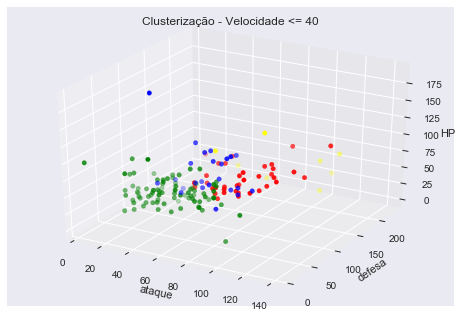

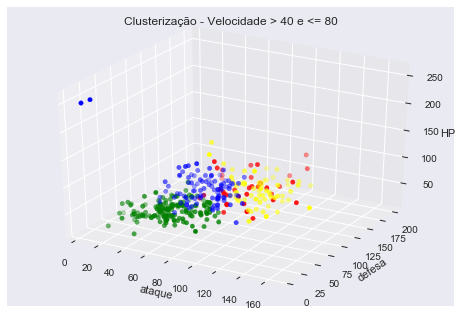

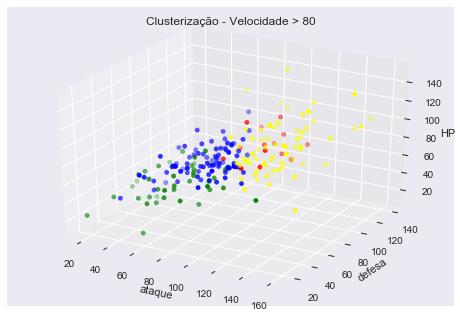

In [46]:
#área de plotagem
fig = plt.figure(figsize=plt.figaspect(0.5))

plot = showcluster([V40.ataque,V40.defesa,V40.HP],4,[['red'],['green'],['blue'],['yellow']], 'Clusterização - Velocidade <= 40')

plot = showcluster([V80.ataque,V80.defesa,V80.HP],4,[['red'],['green'],['blue'],['yellow']], 'Clusterização - Velocidade > 40 e <= 80')

plot = showcluster([Va.ataque,Va.defesa,Va.HP],4,[['red'],['green'],['blue'],['yellow']], 'Clusterização - Velocidade > 80')

plt.show()

### Separando os dataframes de defesa por clusters

In [47]:
#Velocidades baixas
v400 = V40[V40.cluster==0]
v401 = V40[V40.cluster==1]
v402 = V40[V40.cluster==2]
v403 = V40[V40.cluster==3]
V40.cluster.value_counts()

1    66
2    34
3    30
0    22
Name: cluster, dtype: int64

In [48]:
#Velocidades médias
v800 = V80[V80.cluster==0]
v801 = V80[V80.cluster==1]
v802 = V80[V80.cluster==2]
v803 = V80[V80.cluster==3]
V80.cluster.value_counts()

0    172
2    112
1     62
3     12
Name: cluster, dtype: int64

In [49]:
#Velocidades altas
va0 = Va[Va.cluster==0]
va1 = Va[Va.cluster==1]
va2 = Va[Va.cluster==2]
va3 = Va[Va.cluster==3]
Va.cluster.value_counts()

3    86
1    60
0    35
2    30
Name: cluster, dtype: int64